In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load a grayscale image
image = cv2.imread("D:\\Passionate photography\\OUR Photo\\IMG_20230609_151552.jpg", cv2.IMREAD_GRAYSCALE)

array([[  6,   7,   6, ...,   6,   6,   5],
       [  4,   5,   7, ...,   6,   7,   5],
       [  1,   2,   3, ...,   6,   8,   7],
       ...,
       [164, 163, 162, ...,  64,  62,  62],
       [165, 165, 163, ...,  68,  67,  65],
       [163, 164, 163, ...,  70,  68,  65]], dtype=uint8)

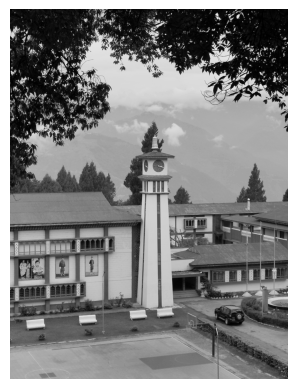

In [2]:
# Display the grayscale image using matplotlib
plt.imshow(image, cmap='gray')  # 'cmap' is set to 'gray' to display the image correctly
plt.axis('off')  # Hide axis
plt.show()

In [4]:
# Calculate the histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

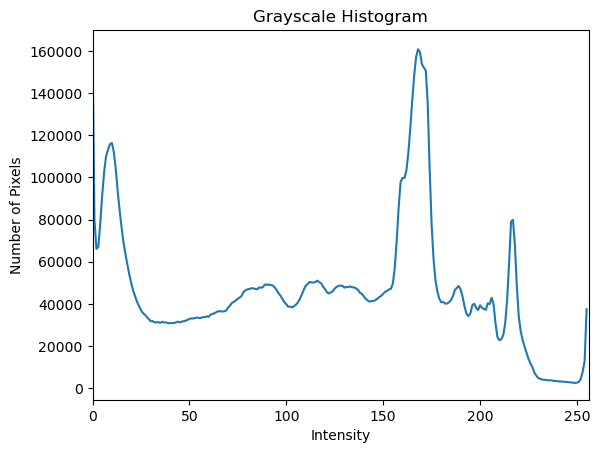

In [5]:
# Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Intensity")
plt.ylabel("Number of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [6]:
# Image Labeling

# Threshold the image to create a binary image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

In [7]:
# Label the connected components
num_labels, labels_im = cv2.connectedComponents(binary_image)

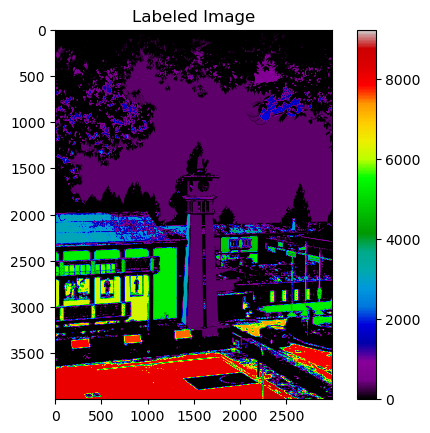

In [8]:
# Display the labeled image
plt.imshow(labels_im, cmap='nipy_spectral')
plt.title("Labeled Image")
plt.colorbar()
plt.show()

In [9]:
# Image Thresholding
# Apply thresholding
thresh_value = 127
_, thresh_image = cv2.threshold(image, thresh_value, 255, cv2.THRESH_BINARY)


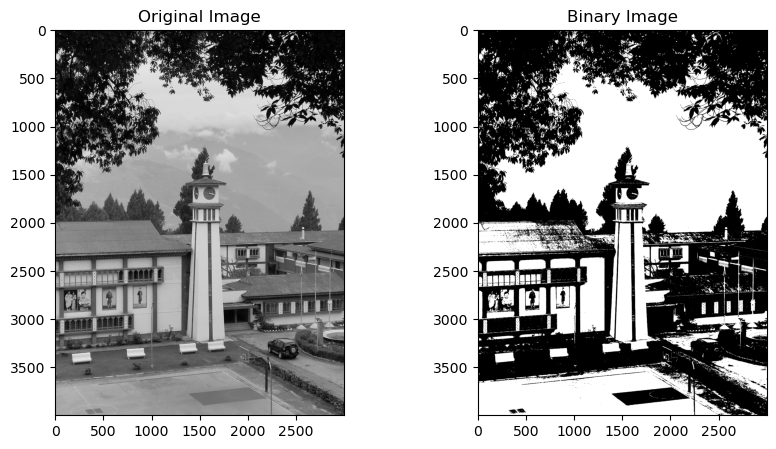

In [10]:
# Display the original and thresholded images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image")
plt.imshow(thresh_image, cmap='gray')
plt.show()

In [10]:
# Specify the path to the video file
video_path = "D:\\Passionate photography\\OUR Photo\\VID_20230428_093317.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video was opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video opened successfully.")


Video opened successfully.


In [11]:
# Create a directory to store extracted frames
output_dir = 'extracted_frames'
os.makedirs(output_dir, exist_ok=True)

print(f"Output directory '{output_dir}' created.")


Output directory 'extracted_frames' created.


In [12]:
frame_count = 0

while True:
    # Read the next frame from the video
    ret, frame = cap.read()
    
    # If no frame is read, break the loop
    if not ret:
        break

    # Construct the filename for the current frame
    frame_filename = os.path.join(output_dir, f'frame_{frame_count:04d}.jpg')

    # Save the frame to the disk
    cv2.imwrite(frame_filename, frame)
    
    # Display the frame (optional)
    cv2.imshow('Frame', frame)
    
    # Wait for 1 ms and check if the user wants to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        S

    frame_count += 1

print(f"Total number of frames extracted: {frame_count}")


Total number of frames extracted: 927


In [13]:
# Release the video capture object and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

print("Video capture released and all windows closed.")


Video capture released and all windows closed.
